### Importando bibliotecas

In [1]:
#------------------------------------------#
# CRIAR DIRETÓRIOS PARA DADOS E RESULTADOS #
#------------------------------------------#
from pathlib import Path
from os import listdir

#-----------------#
# COLETA DE DADOS #
#-----------------#
from urllib.request import urlopen
import requests

#-------------------#
# CONTROLE DE TEMPO #
#-------------------#
from datetime import datetime

#--------------------------------------#
# LISTAR E MANIPULAR ARQUIVOS DE DADOS #
#--------------------------------------#
import os.path
from os.path import isfile, join

### Criando diretórios para dados

In [2]:
#-----#
# TCC #
#-----#

# Definindo nome do diretório
path_tcc = Path.home() / "TCC"

# Verificando se diretório já existe
# Caso não exista, será criado
if os.path.isdir(path_tcc):
    pass
else:
    path_tcc.mkdir()

#-------------------#
# TCC/ArquivosDados #
#-------------------#

# Definindo nome do diretório
path_arq_dados = Path.home() / "TCC/ArquivosDados"

# Verificando se diretório já existe
# Caso não exista, será criado
if os.path.isdir(path_arq_dados):
    pass
else:
    path_arq_dados.mkdir()

### Coleta de Dados

#### Validando se a coleta de dados é permitida neste domínio
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis/robots.txt

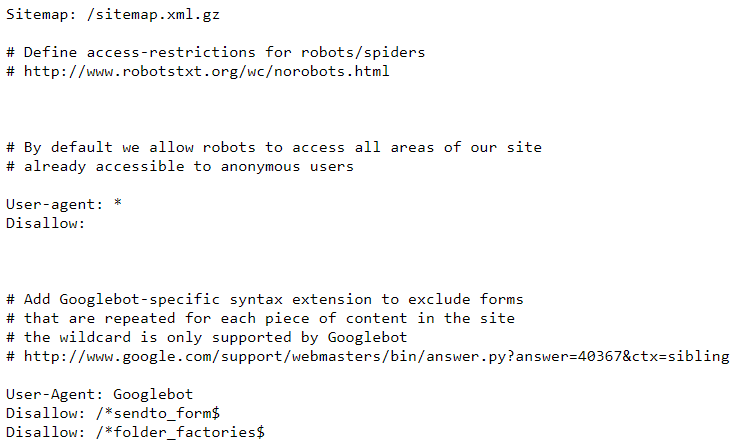

#### Estratégias adotadas para download dos arquivos de dados

Os dados disponíveis nesta fonte de dados estão dispostos em formatos de código diferentes. <br>
Desta forma, a estratégia utilizada para baixar os arquivos do ano de 2021 será diferente dos demais

In [4]:
#-------------------------------------------------#
# BAIXANDO ARQUIVOS DA FONTE DE DADOS ABERTOS ANP #
#-------------------------------------------------#

#----------------------------------------------------------------------------------------#
#         Dependendo da velocidade da conexão, pode levar em torno de 35 minutos         #
#----------------------------------------------------------------------------------------#

# Definindo função para baixar os arquivos
def baixar_arquivo(url, path_arq_dados):
    
    # Requisição ao servidor
    resposta = requests.get(url)
    
    # Registrando se a resposta da requisição ocorreu com sucesso ou não
    if resposta.status_code == requests.codes.OK:
        with open(path_arq_dados, 'wb') as novo_arquivo:
            novo_arquivo.write(resposta.content)
        print("Download finalizado. Salvo em: {}".format(path_arq_dados))
    else:
        resposta.raise_for_status()

#------------------------------------#
# ARQUIVOS DOS ANOS DE 2004 ATÉ 2020 #
#------------------------------------#

# Criando range com valores dos anos (de 2004 até 2020)
range_anos = list(range(2004, 2021))

# Iniciando contagem da duração dos downloads
start_time = datetime.now()

if __name__ == "__main__":
    
    # URL para o primeiro semestre de cada ano
    base_url_01 = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-{}-01.csv"
    
    # URL para o segundo semestre de cada ano
    base_url_02 = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-{}-02.csv"
    
    # Diretório de destino dos downloads realizados
    output_dir = path_arq_dados
    
    # Para cada ano na variável "range_anos" será realizado o download do arquivo correspondente ao primeiro semestre
    for i in range(0, len(range_anos)):
        nome_arquivo = os.path.join(output_dir, "Combustiveis_Automotivos_{}-01.csv".format(range_anos[i]))
        baixar_arquivo(base_url_01.format(range_anos[i]), nome_arquivo)
    
    # Para cada ano na variável "range_anos" será realizado o download do arquivo correspondente ao segundo semestre
    for i in range(0, len(range_anos)):
        nome_arquivo = os.path.join(output_dir, "Combustiveis_Automotivos_{}-02.csv".format(range_anos[i]))
        baixar_arquivo(base_url_02.format(range_anos[i]), nome_arquivo)
        
# Finalizando contagem da duração dos downloads
end_time = datetime.now()

print('Downloads dos arquivos de dados finalizados em {}'.format(end_time - start_time))

Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2004-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2005-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2006-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2007-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2008-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2009-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2010-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2011-01.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automot

In [6]:
#----------------------------#
# EXCEÇÃO - ARQUIVOS DE 2021 #
#----------------------------#

#---------------------------------------------------------------------------------------------------#
#                                        Motivo da exceção                                          #
#---------------------------------------------------------------------------------------------------#
#       O arquivo do primeiro semestre de 2021 possui URL diferente das demais.                     #
#       Com isto, ao ler o ano de 2021 no range de "anos" acima, e executar os comandos para        #
#       download, é lido o ano de 2021 para o primeiro semestre, resultando em erro.                #
#---------------------------------------------------------------------------------------------------#

# Iniciando contagem da duração dos downloads
start_time = datetime.now()

# URL para o primeiro semestre do ano de 2021 (diferente das demais URL's)
sem_1_2021 = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/precos-semestrais-automotivos_2021-01.csv"
baixar_arquivo(sem_1_2021, nome_arquivo)

# URL para o segundo semestre do ano de 2021 (diferente das demais URL's)
sem_2_2021 = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2021-02.csv"
baixar_arquivo(sem_2_2021, nome_arquivo)

# Finalizando contagem da duração dos downloads
end_time = datetime.now()

print('Downloads dos arquivos de dados finalizados em {}'.format(end_time - start_time))

Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2020-02.csv
Download finalizado. Salvo em: C:\Users\caroline.almuinha\TCC\ArquivosDados\Combustiveis_Automotivos_2020-02.csv
Downloads dos arquivos de dados finalizados em 0:00:51.171483
